<a href="https://colab.research.google.com/github/DileepKushwah/House-Price-predication-app/blob/main/HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
features = list()
with open('/content/drive/MyDrive/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [61]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]
# add subject column to the dataframe
# The squeeze argument is deprecated, so read the file as a DataFrame and select the first column
X_train['subject'] = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/subject_train.txt', header=None)[0]

y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt', names=['Activity'])
# squeeze is deprecated, use squeeze method instead to convert to Series if needed
y_train = y_train.squeeze("columns")
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
4007,0.279907,-0.016966,-0.109705,-0.996628,-0.994227,-0.990939,-0.997304,-0.992988,-0.990397,-0.940003,...,-0.562728,0.305563,-0.003942,-0.023322,-0.587103,0.324645,0.192085,21,5,STANDING
4877,0.318903,-0.011953,-0.124315,-0.167306,0.099894,0.062874,-0.225378,0.122089,0.064496,0.095358,...,-0.674454,0.677914,0.786485,0.291604,-0.572904,0.243866,0.281370,23,2,WALKING_UPSTAIRS


In [62]:
train.shape

(7352, 564)

In [63]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/subject_test.txt', header=None)[0]

# get y labels from the txt file
y_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt', names=['Activity'])
# Apply the mapping to the 'Activity' column of y_test DataFrame
y_test_labels = y_test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1419,0.315198,-0.038897,-0.176349,-0.908514,-0.773240,-0.822777,-0.912904,-0.789508,-0.829411,-0.799273,...,0.220464,0.136603,-0.272587,0.060393,0.458837,-0.899631,0.070537,12,6,LAYING
673,0.271811,-0.018151,-0.108164,-0.969319,-0.956427,-0.970184,-0.975381,-0.959786,-0.973316,-0.898425,...,-0.066778,-0.364737,0.267596,-0.007382,0.772563,-0.046118,-0.929288,9,6,LAYING


In [64]:
test.shape

(2947, 564)

### Data Cleaning

1.Check for Duplicates

In [65]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


2.Checking for NaN/null values

In [66]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


3.Save this dataframe in a csv files

In [67]:
train.to_csv('/content/drive/MyDrive/UCI HAR Dataset/train.csv', index=False)
test.to_csv('/content/drive/MyDrive/UCI HAR Dataset/test.csv', index=False)

Exploratory Data Analysis

Obtain the train and test data


In [68]:
train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


All the feature name with lots of unnecessary signs: Changing feature names


In [69]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

1. Investigate participants activity durations.


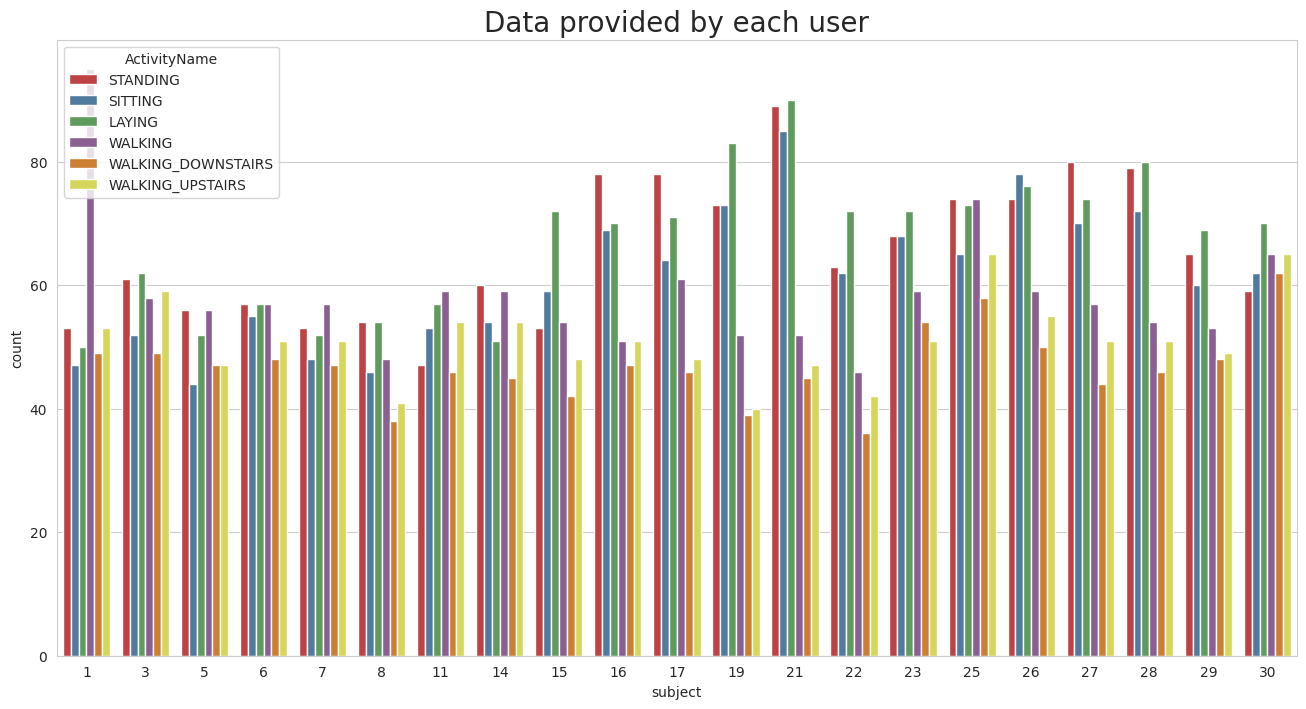

In [70]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

Nearly all participants have more data for walking upstairs than downstairs. Assuming an equal number of up- and down-walks the participants need longer walking upstairs

How Are The Activity Name Distributed?

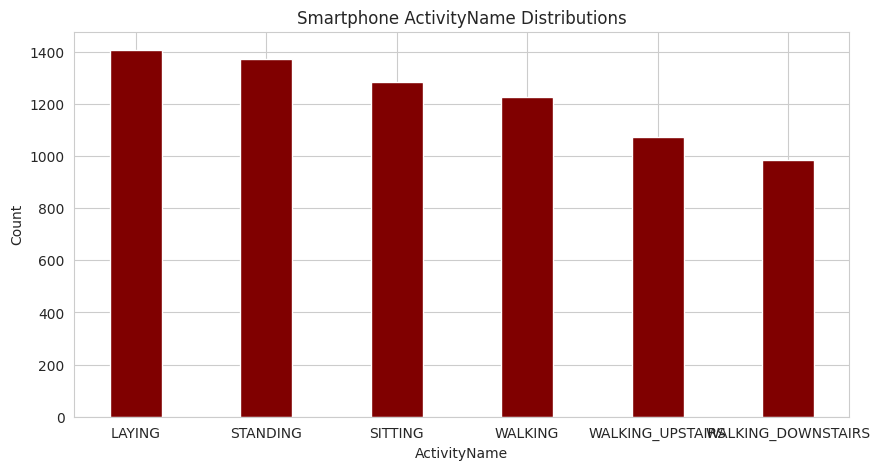

In [71]:
import matplotlib.pyplot as plt

# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(label_counts.index, label_counts, color ='maroon',
        width = 0.4)

plt.xlabel("ActivityName")
plt.ylabel("Count")
plt.title("Smartphone ActivityName Distributions")
plt.show()

Although there are fluctuations in the label counts, the labels are quite equally distributed.
2. Featuring Engineering

Static and Dynamic Activities

In static activities (sit, stand, lie down) motion information will not be very useful.

In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

3. Stationary and Moving activities are completely different

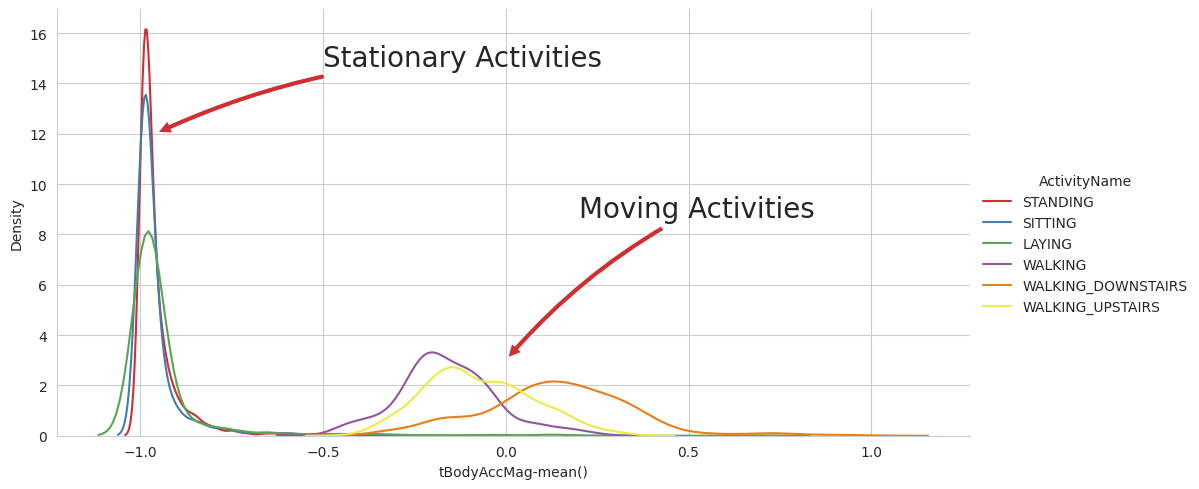

In [72]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5, aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', fill=False).add_legend()

plt.annotate("Stationary Activities", xy=(-0.960, 12), xytext=(-0.5, 15), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.show()



As aspected from most real world data, when participants are moving the data is normally distributed with some long tail.

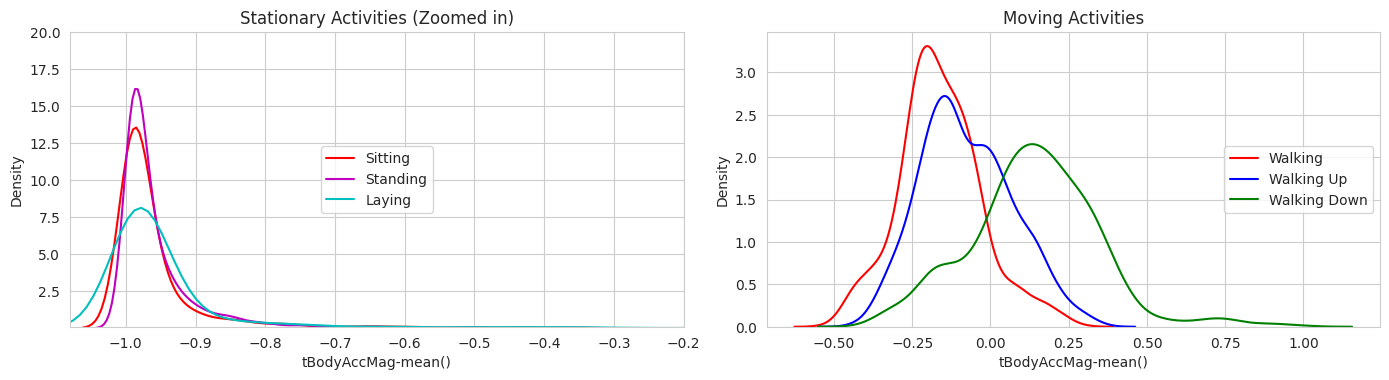

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data based on activities
df1 = train[train['Activity'] == 1]
df2 = train[train['Activity'] == 2]
df3 = train[train['Activity'] == 3]
df4 = train[train['Activity'] == 4]
df5 = train[train['Activity'] == 5]
df6 = train[train['Activity'] == 6]

plt.figure(figsize=(14, 7))

# Plot for stationary activities
plt.subplot(2, 2, 1)
plt.title('Stationary Activities (Zoomed in)')
sns.kdeplot(df4['tBodyAccMag-mean()'], color='r', label='Sitting', fill=False)
sns.kdeplot(df5['tBodyAccMag-mean()'], color='m', label='Standing', fill=False)
sns.kdeplot(df6['tBodyAccMag-mean()'], color='c', label='Laying', fill=False)
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

# Plot for moving activities
plt.subplot(2, 2, 2)
plt.title('Moving Activities')
sns.kdeplot(df1['tBodyAccMag-mean()'], color='red', label='Walking', fill=False)
sns.kdeplot(df2['tBodyAccMag-mean()'], color='blue', label='Walking Up', fill=False)
sns.kdeplot(df3['tBodyAccMag-mean()'], color='green', label='Walking Down', fill=False)
plt.legend(loc='center right')

plt.tight_layout()
plt.show()


We can see clearly here, the distribuation of Stationary Activities and Moving Activities.

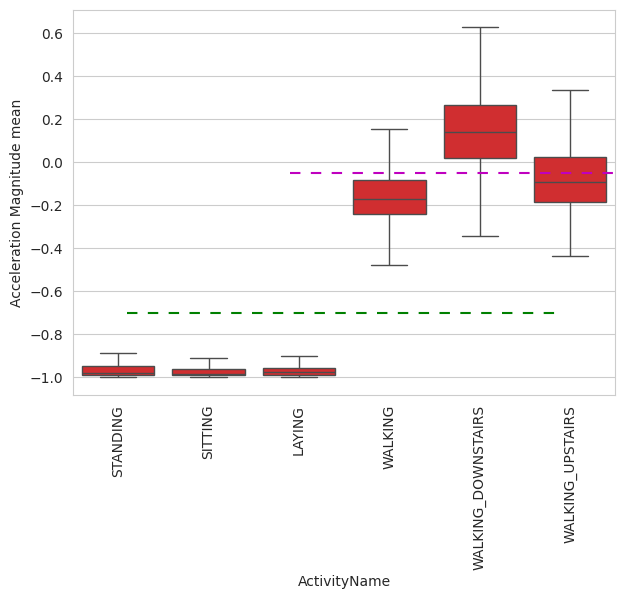

In [74]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
If tAccMean > 0.0 then the Activity is WalkingDownstairs. We can classify 75% the Acitivity labels with some errors


Position of GravityAccelerationComponants also matters


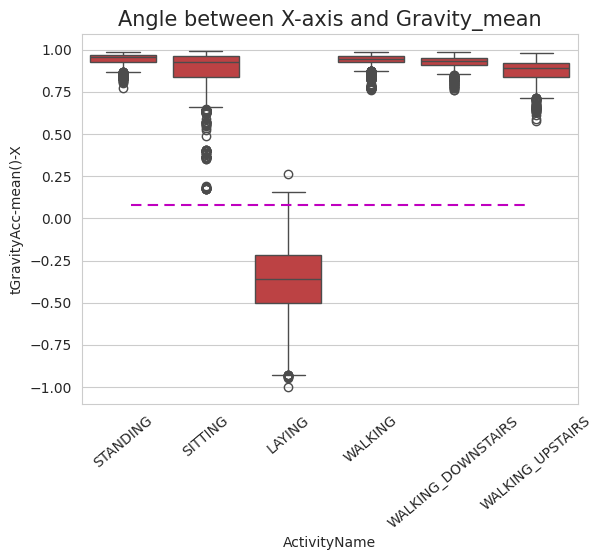

In [75]:
sns.boxplot(x='ActivityName', y='tGravityAcc-mean()-X', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

If angleX,gravityMean > 0 then Activity is Laying.
We can classify all datapoints belonging to Laying activity with just a single if else statement.

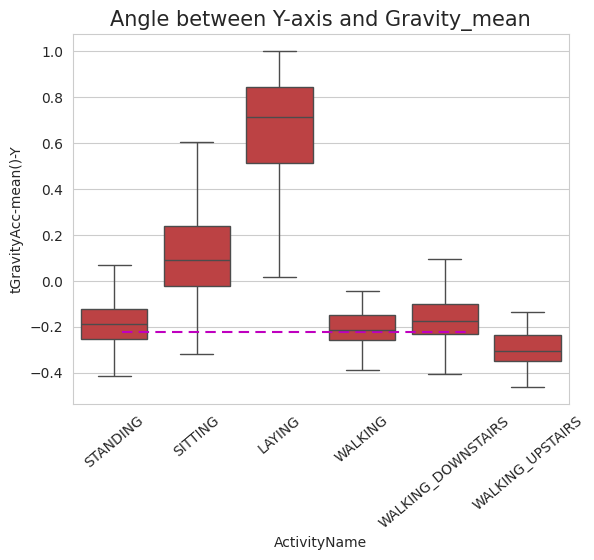

In [76]:
sns.boxplot(x='ActivityName', y='tGravityAcc-mean()-Y', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

Apply t-sne on the data
Are The Activities Separable?

The dataset is geared towards classifying the activity of the participant. Let us investigate the separability of the classes.

In [77]:
from sklearn.manifold import TSNE
import seaborn as sns

In [78]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):

    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')

        # prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})

        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.047s...
[t-SNE] Computed neighbors for 7352 samples in 4.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.034s
[t-SNE] Iteration 50: error = 119.3306732, gradient norm = 0.0437474 (50 iterations in 7.505s)
[t-SNE] Iteration 100: error = 105.2103195, gradient norm = 0.0240791 (50 iterations in 

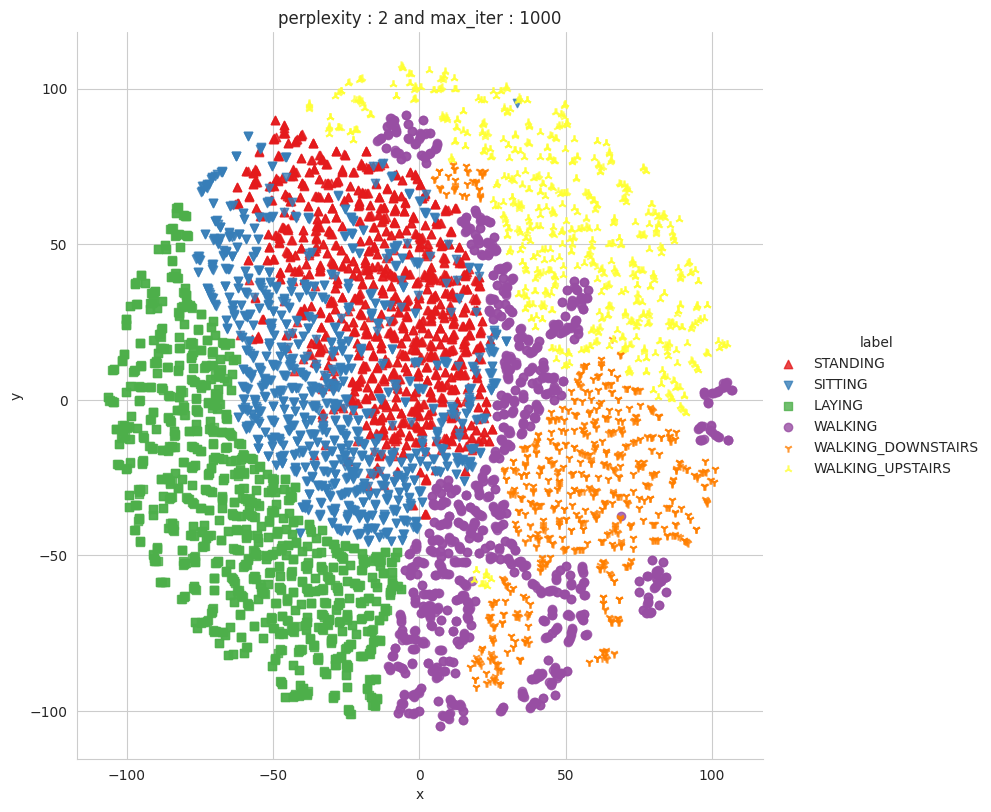

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.030s...
[t-SNE] Computed neighbors for 7352 samples in 2.505s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.038s
[t-SNE] Iteration 50: error = 107.1336670, gradient norm = 0.0398498 (50 iterations in 5.993s)
[t-SNE] Iteration 100: error = 95.7049561, gradient norm = 0.0152551 (50 iteration

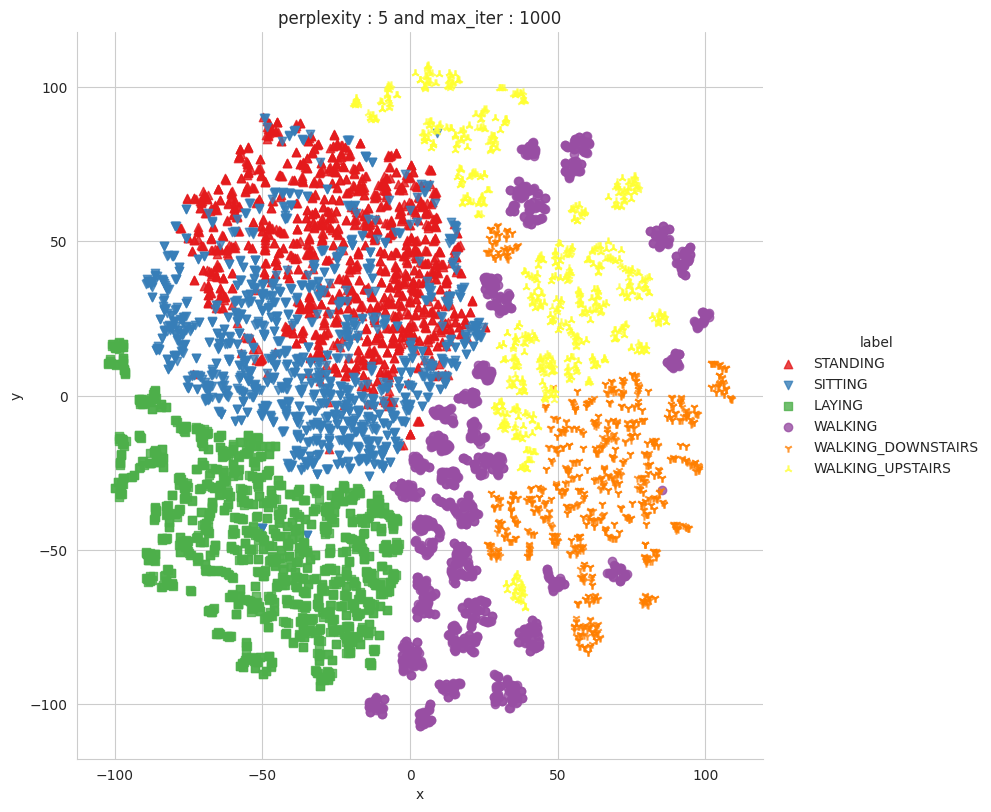

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.024s...
[t-SNE] Computed neighbors for 7352 samples in 2.556s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.070s
[t-SNE] Iteration 50: error = 97.8933182, gradient norm = 0.0374132 (50 iterations in 7.794s)
[t-SNE] Iteration 100: error = 88.9313736, gradient norm = 0.0105889 (50 iteration

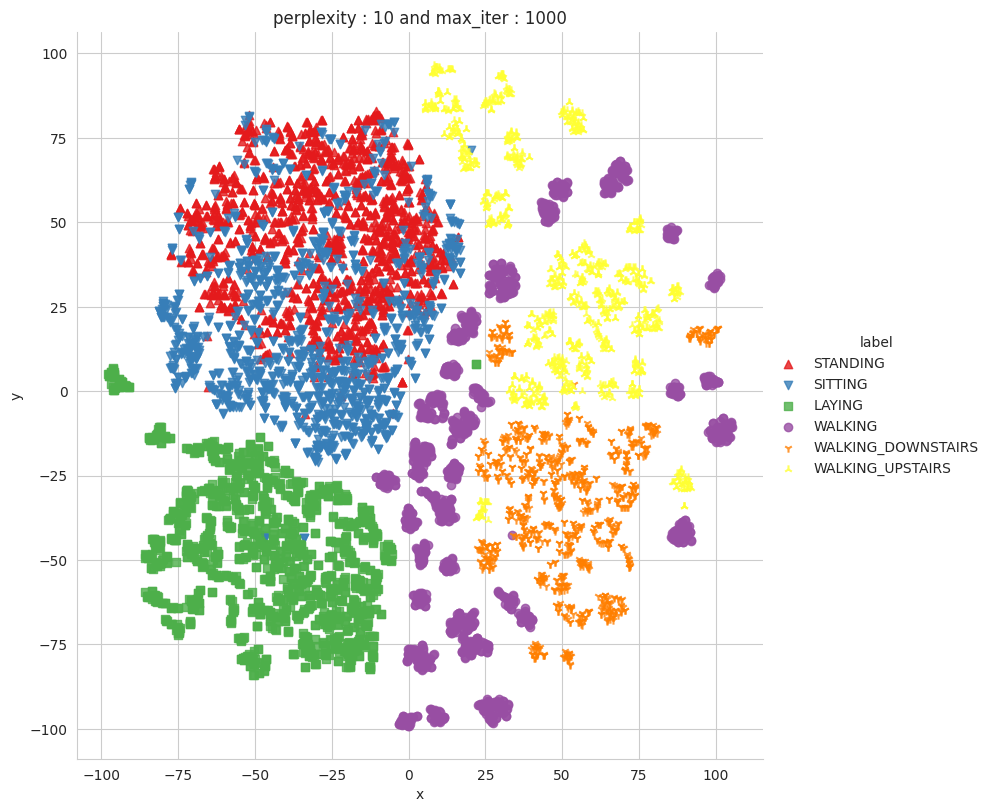

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.026s...
[t-SNE] Computed neighbors for 7352 samples in 3.487s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.226s
[t-SNE] Iteration 50: error = 89.2783737, gradient norm = 0.0302485 (50 iterations in 8.588s)
[t-SNE] Iteration 100: error = 82.9664764, gradient norm = 0.0073039 (50 iteration

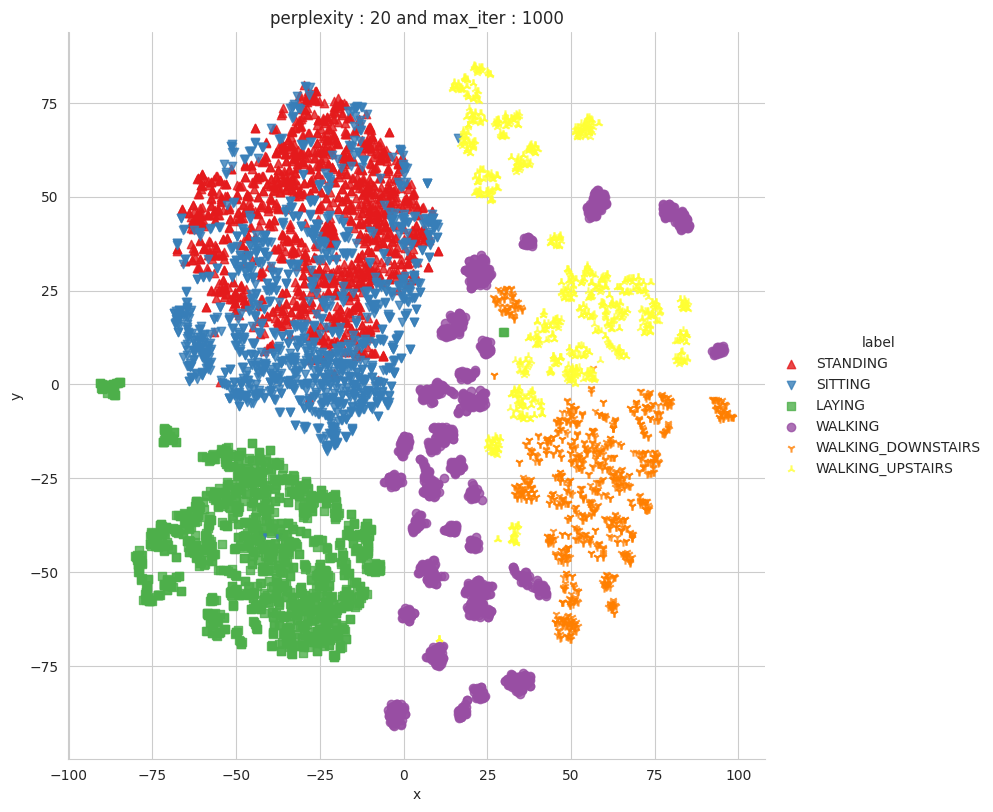

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.036s...
[t-SNE] Computed neighbors for 7352 samples in 4.479s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.552s
[t-SNE] Iteration 50: error = 78.8184586, gradient norm = 0.0247143 (50 iterations in 11.427s)
[t-SNE] Iteration 100: error = 75.2272186, gradient norm = 0.0053075 (50 iterati

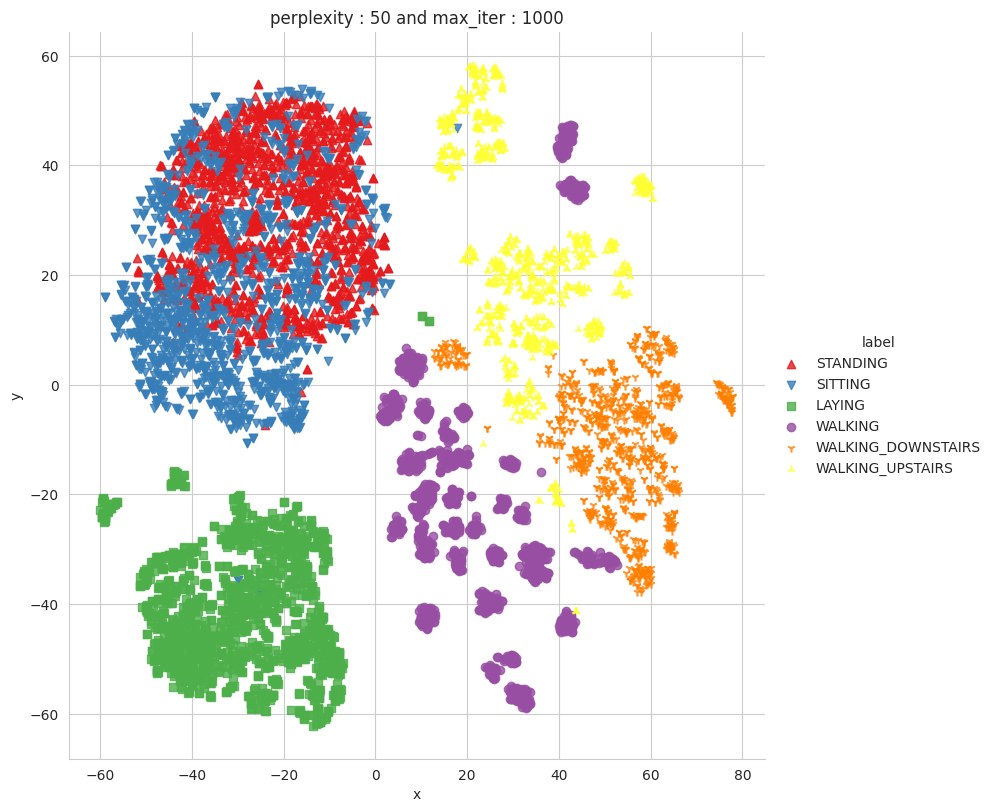

Done


In [79]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

Applying Machine Learning Models

In [80]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [82]:
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING


In [83]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


Creat a model with our Dataset

In [84]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']


Let's define a function to plot the confusion matrix

In [85]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Let's define a function to run any model specified

In [86]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):


    # to store results at various phases
    results = dict()

    # time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done....!\n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))


    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done....!\n')
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred


    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))



    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))

    # plot confusin matrix
    plt.figure(figsize=(6,6))
    plt.grid(visible=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)

    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)

    # add the trained  model to the results
    results['model'] = model

    return results

Define function to print the gridsearch Parameters

In [87]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))


    #  number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal numbre of cross validation sets: {}'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of best estimator : {}'.format(model.best_score_))

1. Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done....!

==> training time:- 0:00:41.674722

Predicting test data
Done....!

==> testing time:- 0:00:00.020226

==> Accuracy:- 0.9586019681031558


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


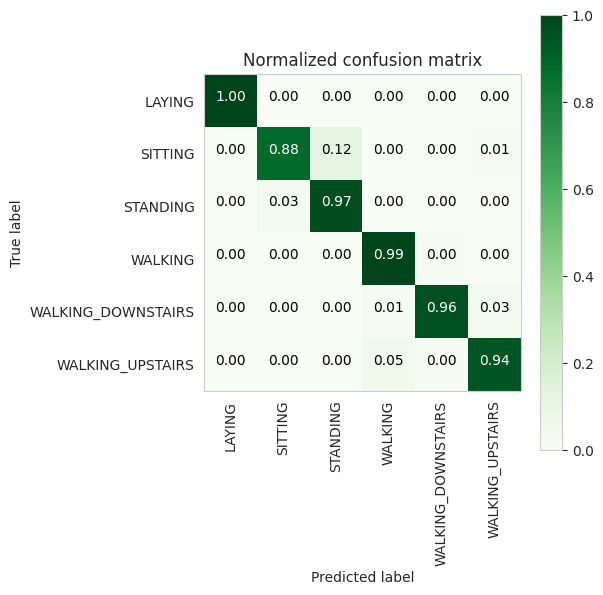

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



==> Best Estimator:
	LogisticRegression(C=1)


==> Best parameters:
	Parameters of best estimator : {'C': 1, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator : 0.9368895661079609


In [88]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

#Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

2. Decision Trees with GridSearchCV

training the model..
Done....!

==> training time:- 0:00:48.327149

Predicting test data
Done....!

==> testing time:- 0:00:00.010172

==> Accuracy:- 0.8639294197488971


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 388 103   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 471  17   8]
 [  0   0   0  17 342  61]
 [  0   0   0  78  24 369]]


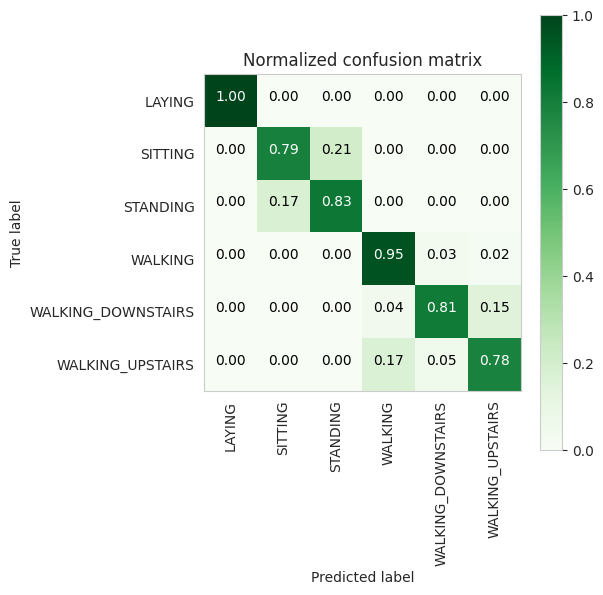

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.79      0.80       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.89      0.81      0.85       420
  WALKING_UPSTAIRS       0.84      0.78      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



==> Best Estimator:
	DecisionTreeClassifier(max_depth=7)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 7}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.8488909853540327


In [89]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(dt_grid_results['model'])

3. Random Forest Classifier with GridSearch

training the model..
Done....!

==> training time:- 0:40:33.829177

Predicting test data
Done....!

==> testing time:- 0:00:00.125909

==> Accuracy:- 0.9253478113335596


 ********Confusion Matrix********

 [[537   0   0   0   0   0]
 [  0 433  58   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 480  10   6]
 [  0   0   0  21 358  41]
 [  0   0   0  38   6 427]]


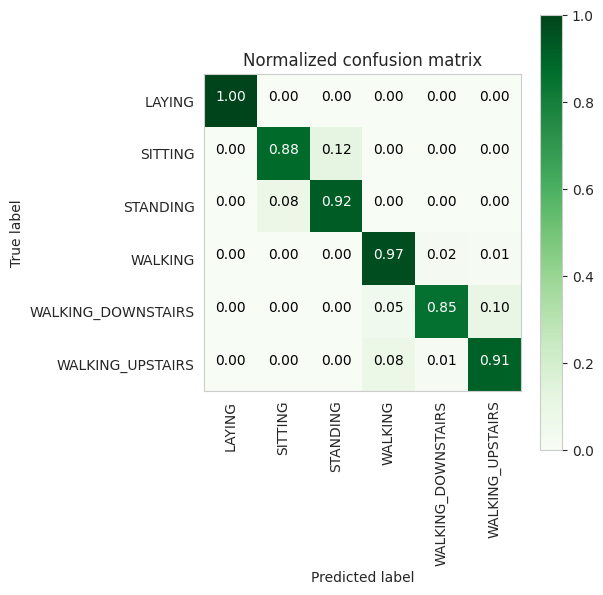

****************| Classifiction Report |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.88      0.90       491
          STANDING       0.89      0.92      0.91       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



==> Best Estimator:
	RandomForestClassifier(max_depth=13, n_estimators=130)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 13, 'n_estimators': 130}

==> No. of CrossValidation sets:
	Total numbre of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator : 0.920433413338143


In [57]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model
print_grid_search_attributes(rfc_grid_results['model'])

In [92]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))


print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.86%       4.14%
DecisionTree        : 86.39%      13.61% 
Random Forest       : 92.53%      7.465% 


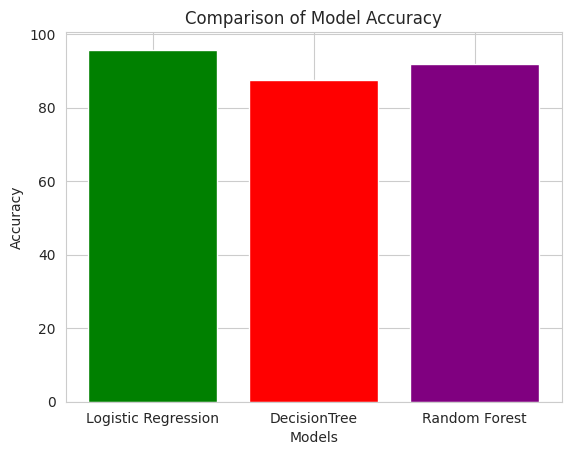

In [95]:
x= ["Logistic Regression","DecisionTree","Random Forest"]
y= [95.79,87.68,91.96]
plt.bar(x,y, color=['green', 'red','purple'])
plt.xlabel("Models")
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.show()

From the result, we can choose ___Linear SVC___ or ___rbf SVM___ as our ML Model.

Applying LSTM Models on Raw Data

In [97]:
# Importing Libraries

import pandas as pd
import numpy as np

# Import Keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
# Import Dense and Dropout directly from keras.layers
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
from keras.regularizers import L1L2

In [99]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# function to print the confusion matrix

def confusion_matrix(Y_true, Y_pred):

    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])


    result = confusion_matrix(Y_true, Y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(result,
                xticklabels= list(ACTIVITIES.values()),
                yticklabels=list(ACTIVITIES.values()),
                annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [101]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
    ]

In [103]:
# define a function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/MyDrive/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).to_numpy()
        )

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [104]:
def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'/content/drive/MyDrive/UCI HAR Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).to_numpy()

In [105]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [106]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [107]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [108]:
#function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [109]:
# Loading the train and test data
X_train, X_test, y_train, y_test = load_data()

In [110]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [111]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,574 (21.77 KB)

 Trainable params: 5,574 (21.77 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [114]:
# Training the model
model.fit(X_train, y_train, batch_size=batch_size, validation_data=(X_test, y_test),epochs=epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.5196 - loss: 1.1079 - val_accuracy: 0.6169 - val_loss: 0.8408
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.6592 - loss: 0.7441 - val_accuracy: 0.7011 - val_loss: 0.7112
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.7475 - loss: 0.6166 - val_accuracy: 0.7710 - val_loss: 0.6135
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8763 - loss: 0.4070 - val_accuracy: 0.8110 - val_loss: 0.5699
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9020 - loss: 0.3324 - val_accuracy: 0.8646 - val_loss: 0.3946
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.9132 - loss: 0.2752 - val_accuracy: 0.8850 - val_loss: 0.3748
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9267 - loss: 0.2322 - val_accuracy: 0.8833 - val_loss: 0.3694
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9325 - loss: 0.2146 - 

In [115]:
# Confusion Matrix
confusion_matrix(y_test, model.predict(X_test))

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,519,0,0,0,0,18
SITTING,0,356,133,0,0,2
STANDING,0,81,449,1,0,1
WALKING,0,0,0,481,11,4
WALKING_DOWNSTAIRS,0,0,0,26,392,2
WALKING_UPSTAIRS,0,0,0,26,5,440


In [116]:
score = model.evaluate(X_test, y_test)

print("\n   categorical_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8582 - loss: 0.5046

   categorical_crossentropy  ||   accuracy 
  ____________________________________
[0.41967180371284485, 0.894808292388916]


2.Defining the Architecture of 2-Layer of LSTM with more hyperparameter tunning
2.1 First Model for 2-Layer of LSTM with more hyperparameter tunning

In [117]:
# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [119]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128, 48)             │          11,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 48)             │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128, 48)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,894 (85.52 KB)

 Trainable params: 21,798 (85.15 KB)

 Non-trainable params: 96 (384.00 B)

In [120]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [121]:
# Training the model
model.fit(X_train, y_train, batch_size=n_batch, validation_data=(X_test, y_test), epochs=n_epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 77s 156ms/step - accuracy: 0.5723 - loss: 1.9375 - val_accuracy: 0.7496 - val_loss: 1.1141
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 77s 146ms/step - accuracy: 0.8261 - loss: 0.9014 - val_accuracy: 0.4880 - val_loss: 1.8885
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 88s 160ms/step - accuracy: 0.8942 - loss: 0.5337 - val_accuracy: 0.9002 - val_loss: 0.3853
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 64s 121ms/step - accuracy: 0.9228 - loss: 0.3577 - val_accuracy: 0.9033 - val_loss: 0.3217
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 88s 133ms/step - accuracy: 0.9208 - loss: 0.2741 - val_accuracy: 0.9060 - val_loss: 0.2733
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 75s 118ms/step - accuracy: 0.9200 - loss: 0.2620 - val_accuracy: 0.9141 - val_loss: 0.2693
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 56s 121ms/step - accuracy: 0.9261 - loss: 0.2156 - val_accuracy: 0.9131 - val_loss: 0.2462
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 80s 118ms/step - accuracy: 0.9223 - loss: 0

In [123]:
# Confusion Matrix
confusion_matrix(y_test, model.predict(X_test))

93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,270,219,0,0,2
STANDING,0,35,497,0,0,0
WALKING,0,0,0,446,50,0
WALKING_DOWNSTAIRS,0,0,0,2,415,3
WALKING_UPSTAIRS,0,0,0,0,41,430


In [124]:
score = model.evaluate(X_test, y_test)

print("\n   categorica_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8448 - loss: 0.5708

   categorica_crossentropy  ||   accuracy 
  ____________________________________
[0.4880416691303253, 0.8805565237998962]


2.2 Second Model for 2-Layer of LSTM with more hyperparameter tunning

In [125]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 128, 64)             │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 48)                  │          21,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             294 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,190 (160.90 KB)

 Trainable params: 41,062 (160.40 KB)

 Non-trainable params: 128 (512.00 B)

In [126]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [127]:
# Training the model
model.fit(X_train, y_train, batch_size=n_batch, validation_data=(X_test, y_test), epochs=n_epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 72s 148ms/step - accuracy: 0.6096 - loss: 2.0932 - val_accuracy: 0.4907 - val_loss: 2.1149
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 80s 144ms/step - accuracy: 0.8841 - loss: 0.8799 - val_accuracy: 0.8867 - val_loss: 0.6095
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 79s 137ms/step - accuracy: 0.8993 - loss: 0.5079 - val_accuracy: 0.8812 - val_loss: 0.4919
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 85s 143ms/step - accuracy: 0.9251 - loss: 0.2967 - val_accuracy: 0.9030 - val_loss: 0.3009
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 67s 146ms/step - accuracy: 0.9358 - loss: 0.2104 - val_accuracy: 0.8829 - val_loss: 0.4197
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/step - accuracy: 0.9251 - loss: 0.2270 - val_accuracy: 0.8877 - val_loss: 0.3217
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 64s 139ms/step - accuracy: 0.9208 - loss: 0.2246 - val_accuracy: 0.9094 - val_loss: 0.2521
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 84s 142ms/step - accuracy: 0.9372 - loss: 0

In [128]:
# Confusion Matrix
confusion_matrix(y_test, model.predict(X_test))

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,404,84,0,0,3
STANDING,0,117,415,0,0,0
WALKING,0,0,0,465,25,6
WALKING_DOWNSTAIRS,0,0,0,0,418,2
WALKING_UPSTAIRS,0,4,0,6,19,442


In [129]:
score = model.evaluate(X_test, y_test)

print("\n   categorical_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8566 - loss: 0.3371

   categorical_crossentropy  ||   accuracy 
  ____________________________________
[0.28206825256347656, 0.9097387194633484]


In [130]:
from prettytable import PrettyTable

In [131]:
ptable1 = PrettyTable()
ptable1.title = " Model Comparision "
ptable1.field_names = ['Model Name','Hyperparameter Tunning', 'Accuracy']

print("\n\n ********** Machine Learning Model Comparision ************")
ptable1.add_row(["Logistic Regression","Done","95.83%"])
ptable1.add_row(["Linear SVC  ","Done","96.74%"])
ptable1.add_row(["rbf SVM classifier","Done","96.27%"])
ptable1.add_row(["DecisionTree","Done","87.78%"])
ptable1.add_row(["Random Forest","Done","92.67%"])

print(ptable1)
# *****************************************************************

ptable2 = PrettyTable()
ptable2.title = " Model Comparision "
ptable2.field_names = ['Model Name','Hyperparameter Tunning', 'categorical_crossentropy', 'Accuracy']

print("\n\n ********************************* Deep Learning LSTM Model Comparision ***********************************")
ptable2.add_row(["LSTM With 1_Layer(neurons:32)","Done","0.47", "0.91"])
ptable2.add_row(["LSTM With 2_Layer(neurons:48, neurons:32)","Done","0.39", "0.91"])
ptable2.add_row(["LSTM With 2_Layer(neurons:64, neurons:48)","Done","0.27", "0.91"])

print(ptable2)



 ********** Machine Learning Model Comparision ************
+---------------------------------------------------------+
|                    Model Comparision                    |
+---------------------+------------------------+----------+
|      Model Name     | Hyperparameter Tunning | Accuracy |
+---------------------+------------------------+----------+
| Logistic Regression |          Done          |  95.83%  |
|     Linear SVC      |          Done          |  96.74%  |
|  rbf SVM classifier |          Done          |  96.27%  |
|     DecisionTree    |          Done          |  87.78%  |
|    Random Forest    |          Done          |  92.67%  |
+---------------------+------------------------+----------+


 ********************************* Deep Learning LSTM Model Comparision ***********************************
+----------------------------------------------------------------------------------------------------------+
|                                            Model Comparis